# Regression Modeling for GPA

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Data Import

In [11]:
df = pd.read_csv('./data/cleaned_student_lifetyle_dataset.csv')

In [12]:
df.head()

,Student_ID,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [13]:
df = df.drop(columns=['Stress_Level', 'Student_ID'])
# stress level should not be considered for determining GPA, as it will be used in classification. 
# Student Id is irrelevent for model training

In [14]:
df.head()

,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA
0,6.9,3.8,8.7,2.8,1.8,2.99
1,5.3,3.5,8.0,4.2,3.0,2.75
2,5.1,3.9,9.2,1.2,4.6,2.67
3,6.5,2.1,7.2,1.7,6.5,2.88
4,8.1,0.6,6.5,2.2,6.6,3.51


## Model Training

In [15]:
X = df.drop(columns='GPA')
y = df['GPA']

In [51]:
test_sizes = np.arange(0.2, 0.4, 0.01)
r2_scores = []
rmse_scores = []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size)
    lr = LinearRegression()
    rf = RandomForestRegressor()
    lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    r2_scores.append({'Linear Regression': lr.score(X_test, y_test), \
                      'Random Forest': rf.score(X_test, y_test)})
    lr_preds = lr.predict(X_test)
    rf_preds = rf.predict(X_test)
    baseline_preds = np.full_like(y_test, y_test.mean())
    rmse_scores.append({'Linear Regression': root_mean_squared_error(y_test, lr_preds), \
                        'Random Forest': root_mean_squared_error(y_test, rf_preds), \
                        'Baseline': root_mean_squared_error(y_test, baseline_preds)})

In [31]:
r2 = pd.DataFrame(r2_scores)
rmse = pd.DataFrame(rmse_scores)

In [32]:
r2['test_size'] = test_sizes
rmse['test_size'] = test_sizes

In [33]:
r2

,Linear Regression,Random Forest,test_size
0,0.505182,0.440739,0.20
1,0.503063,0.440679,0.21
2,0.507108,0.454249,0.22
3,0.506205,0.447645,0.23
4,0.505174,0.433044,0.24
5,0.511243,0.445539,0.25
6,0.511807,0.441370,0.26
7,0.505539,0.440974,0.27
8,0.506716,0.438702,0.28
9,0.507788,0.439143,0.29


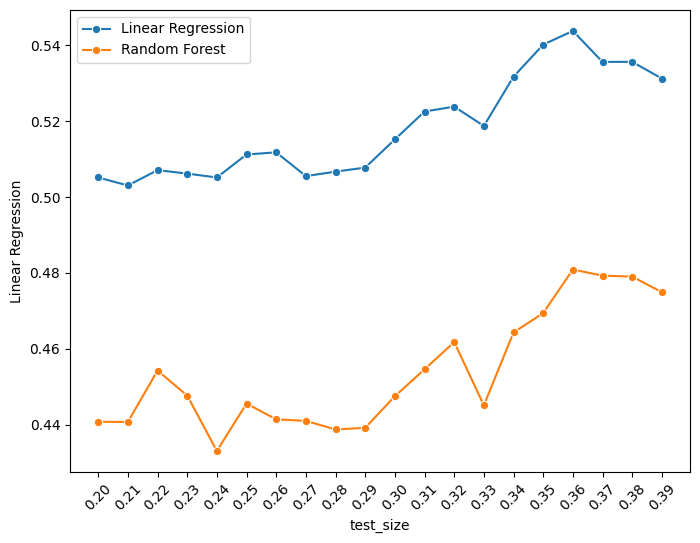

In [43]:
sns.lineplot(data=r2, x='test_size', y='Linear Regression', marker='o', label='Linear Regression')
sns.lineplot(data=r2, x='test_size', y='Random Forest', marker='o', label='Random Forest')
plt.xticks(test_sizes, rotation=45);

In [39]:
rmse

,Linear Regression,Random Forest,Baseline,test_size
0,0.201091,0.213785,0.285871,0.20
1,0.204435,0.216888,0.290005,0.21
2,0.201555,0.212088,0.287090,0.22
3,0.201780,0.213410,0.287148,0.23
4,0.201256,0.215425,0.286103,0.24
5,0.201444,0.214557,0.288143,0.25
6,0.201223,0.215250,0.287993,0.26
7,0.201581,0.214339,0.286672,0.27
8,0.202303,0.215799,0.288040,0.28
9,0.202214,0.215855,0.288227,0.29


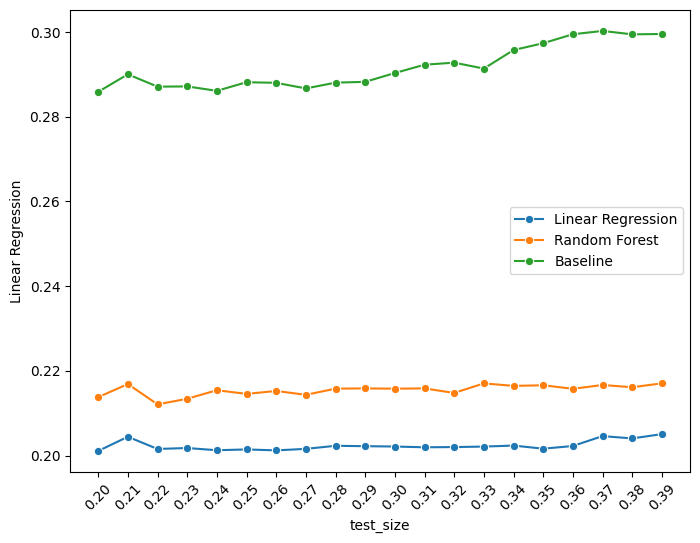

In [42]:
sns.lineplot(data=rmse, x='test_size', y='Linear Regression', marker='o', label='Linear Regression')
sns.lineplot(data=rmse, x='test_size', y='Random Forest', marker='o', label='Random Forest')
sns.lineplot(data=rmse, x='test_size', y='Baseline', marker='o', label='Baseline')
plt.xticks(test_sizes, rotation=45);

## KNN

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.36)

In [66]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

In [71]:
scores = []
for neighbor in range(3, 40, 2):
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    
    knn.fit(X_train_sc, y_train)
    k_preds = knn.predict(X_test_sc)
    scores.append({'K': neighbor, 'R2': knn.score(X_test_sc, y_test), 'RMSE': root_mean_squared_error(y_test, k_preds)})

knn_scores = pd.DataFrame(scores)

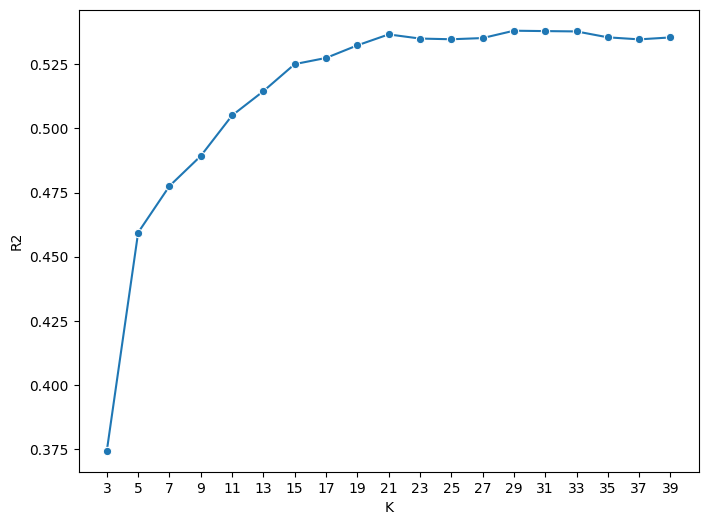

In [72]:
sns.lineplot(data=knn_scores, x='K', y='R2', marker='o')
plt.xticks(range(3, 40, 2));

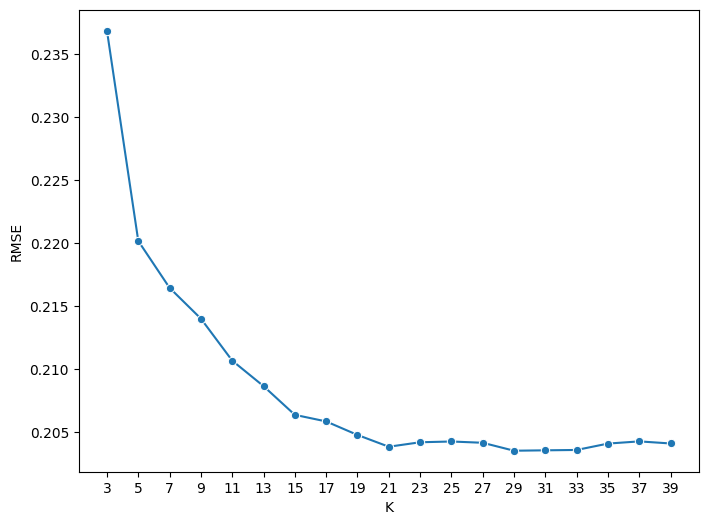

In [73]:
sns.lineplot(data=knn_scores, x='K', y='RMSE', marker='o')
plt.xticks(range(3, 40, 2));

In [74]:
knn_scores

,K,R2,RMSE
0,3,0.374391,0.236860
1,5,0.459422,0.220176
2,7,0.477543,0.216454
3,9,0.489268,0.214011
4,11,0.505052,0.210678
5,13,0.514515,0.208655
6,15,0.525062,0.206376
7,17,0.527465,0.205853
8,19,0.532375,0.204781
9,21,0.536637,0.203845
